<a href="https://colab.research.google.com/github/BamlakHun/Pandas/blob/main/cafeTips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_name = "https://raw.githubusercontent.com/BamlakHun/Pandas/refs/heads/main/Tips.csv"
df = pd.read_csv(file_name)

In [5]:
print('Head: \n', df.head())
print('Tail: \n', df.tail())

Head: 
   total_bill   tip     sex smoker  day    time size
0      16.99  1.01  Female     No  Sun  Dinner    2
1      10.34  1.66    Male     No  Sun  Dinner    3
2      21.01   3.5    Male     No  Sun  Dinner    3
3      23.68  3.31    Male     No  Sun  Dinner    2
4      24.59  3.61  Female     No  Sun  Dinner    4
Tail: 
                        total_bill   tip     sex smoker   day    time size
488                         22.67   2.0    Male    Yes   Sat  Dinner    2
489                         17.82  1.75    Male     No   Sat  Dinner    2
490                         18.78   3.0  Female     No  Thur  Dinner    2
491                sidebar toggle   NaN     NaN    NaN   NaN     NaN  NaN
492  sidebar togglesidebar toggle   NaN     NaN    NaN   NaN     NaN  NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   total_bill  493 non-null    object
 1   tip         489 non-null    object
 2   sex         489 non-null    object
 3   smoker      489 non-null    object
 4   day         489 non-null    object
 5   time        489 non-null    object
 6   size        489 non-null    object
dtypes: object(7)
memory usage: 27.1+ KB


In [7]:
df.describe()

,total_bill,tip,sex,smoker,day,time,size
count,493,489,489,489,489,489,489
unique,232,124,3,3,5,3,7
top,13.42,2.0,Male,No,Sat,Dinner,2
freq,6,66,314,302,174,352,312


In [8]:
df[['sex','smoker','day','time']].describe()

,sex,smoker,day,time
count,489,489,489,489
unique,3,3,5,3
top,Male,No,Sat,Dinner
freq,314,302,174,352


In [9]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.5,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
df['tip'] = pd.to_numeric(df['tip'], errors='coerce')
df['total_bill'] = pd.to_numeric(df['total_bill'], errors='coerce')

df['tip%'] = df['tip'] / df['total_bill']

print(df.head())

   total_bill   tip     sex smoker  day    time size      tip%
0       16.99  1.01  Female     No  Sun  Dinner    2  0.059447
1       10.34  1.66    Male     No  Sun  Dinner    3  0.160542
2       21.01  3.50    Male     No  Sun  Dinner    3  0.166587
3       23.68  3.31    Male     No  Sun  Dinner    2  0.139780
4       24.59  3.61  Female     No  Sun  Dinner    4  0.146808


In [12]:
df['smoker']

,smoker
0,No
1,No
2,No
3,No
4,No
...,...
488,Yes
489,No
490,No
491,NaN


In [13]:
condition = df['smoker'] == 'Yes'
condition

,smoker
0,False
1,False
2,False
3,False
4,False
...,...
488,True
489,False
490,False
491,False


In [14]:
condition = df['smoker'] == 'Yes'
df[condition] # this is equvalent to df[df['smoker'] == 'Yes']

,total_bill,tip,sex,smoker,day,time,size,tip%
56,38.01,3.00,Male,Yes,Sat,Dinner,4,0.078927
58,11.24,1.76,Male,Yes,Sat,Dinner,2,0.156584
60,20.29,3.21,Male,Yes,Sat,Dinner,2,0.158206
61,13.81,2.00,Male,Yes,Sat,Dinner,2,0.144823
62,11.02,1.98,Male,Yes,Sat,Dinner,2,0.179673
...,...,...,...,...,...,...,...,...
481,15.53,3.00,Male,Yes,Sat,Dinner,2,0.193175
483,12.60,1.00,Male,Yes,Sat,Dinner,2,0.079365
484,32.83,1.17,Male,Yes,Sat,Dinner,2,0.035638
487,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584


In [15]:
df[['tip', 'day']][condition]

,tip,day
56,3.00,Sat
58,1.76,Sat
60,3.21,Sat
61,2.00,Sat
62,1.98,Sat
...,...,...
481,3.00,Sat
483,1.00,Sat
484,1.17,Sat
487,2.00,Sat


In [16]:
condition = df['smoker']=='Yes'

print(f'{df["tip%"][condition].max()}')

0.710344827586207


In [17]:

print('Max tip% by smoker class')
print(f'Smoker: {df["tip%"][df["smoker"] == "Yes"].max()*100:.2f}%')
print(f'Nonsmoker: {df["tip%"][df["smoker"] == "No"].max()*100:.2f}%')

Max tip% by smoker class
Smoker: 71.03%
Nonsmoker: 29.20%


In [18]:
print('Average tip% by smoker class')
print(f'Smoker: {df["tip%"][df["smoker"] == "Yes"].mean()*100:.2f}%')
print(f'Nonsmoker: {df["tip%"][df["smoker"] == "No"].mean()*100:.2f}%')

Average tip% by smoker class
Smoker: 16.32%
Nonsmoker: 15.93%


In [19]:
df['tip%'][df['smoker']=='Yes'].describe()

,tip%
count,186.000000
mean,0.163196
std,0.084889
min,0.035638
25%,0.106771
50%,0.153846
75%,0.195059
max,0.710345


In [21]:
max_tip_percent = df['tip%'][df['smoker']=='Yes'].describe()[7]

print('Max Tip:', max_tip_percent);

Max Tip: 0.710344827586207


<ipython-input-21-093bfa550fc9>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_tip_percent = df['tip%'][df['smoker']=='Yes'].describe()[7]


In [22]:
df[df['tip%'] == max_tip_percent]

,total_bill,tip,sex,smoker,day,time,size,tip%
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
419,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


In [23]:
max_tip = df['tip'].describe()[7]


df[df['tip'] == max_tip]

<ipython-input-23-b32e3b5ab2d7>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_tip = df['tip'].describe()[7]


,total_bill,tip,sex,smoker,day,time,size,tip%
170,50.81,10.0,Male,Yes,Sat,Dinner,3,0.196812
417,50.81,10.0,Male,Yes,Sat,Dinner,3,0.196812


day
Sat     174
Sun     152
Thur    124
Fri      38
day       1
Name: count, dtype: int64


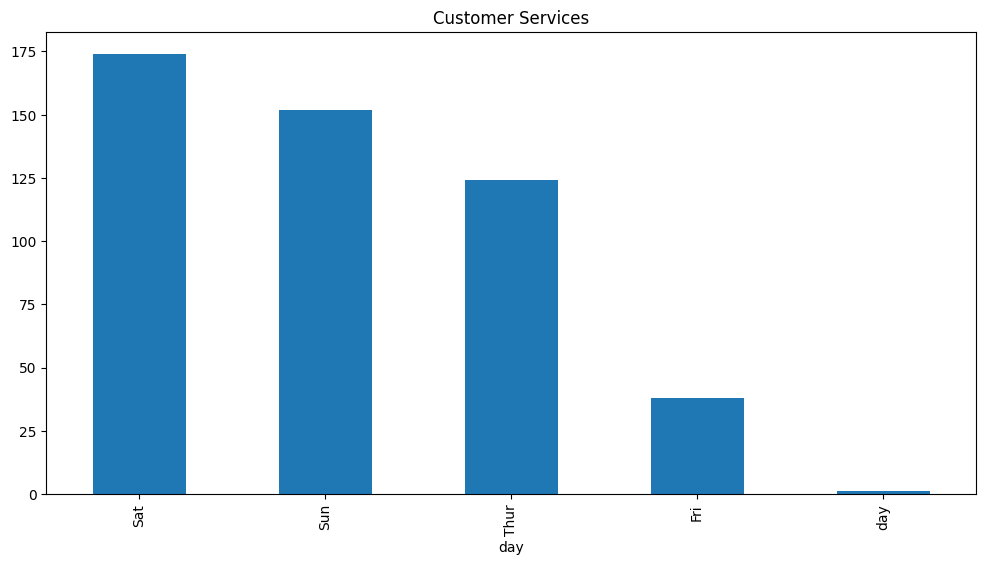

In [24]:

 print(df['day'].value_counts()) # How many Lunch and Dinner events

 df['day'].value_counts().plot(kind='bar', figsize=(12, 6), title='Customer Services');

In [25]:
print(df[['day', 'time']].value_counts())

day   time  
Sat   Dinner    174
Sun   Dinner    152
Thur  Lunch     122
Fri   Dinner     24
      Lunch      14
Thur  Dinner      2
day   time        1
Name: count, dtype: int64


In [26]:
day_list = {'Sat', 'Sun', 'Thur', 'Fri'}
time_list = {'Lunch', 'Dinner'}


for i_day in day_list:                            # Outer loop
  for i_time in time_list:                        # Inner loop
    print(
        i_day, ',',
        i_time, ', Average tip: ',
        df['tip'][(df['day'] == i_day) & (df['time'] == i_time)].mean()
        )

Thur , Dinner , Average tip:  3.0
Thur , Lunch , Average tip:  2.767704918032787
Sun , Dinner , Average tip:  3.2551315789473683
Sun , Lunch , Average tip:  nan
Fri , Dinner , Average tip:  2.94
Fri , Lunch , Average tip:  2.382857142857143
Sat , Dinner , Average tip:  2.993103448275862
Sat , Lunch , Average tip:  nan


In [ ]:
# The best tip on Averge happen on Sunday